# Comprehensive Analysis of U.S Housing Market Trends:
#### How Long do Homes Stay on the Market Before Selling?

For this project, I will be analyzing the "Mean Days to Pending" dataset from the Days on Market and Price Cuts section of Zillow's public research data. This data can be found at https://www.zillow.com/research/data/.

I specifically want to explore how long homes remain on the market before they are sold. I will be performing some exploratory data analysis, data cleaning and transformation, time-series analysis and visualizations.

### Import Libraries

In [148]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

### Load the Dataset

In [149]:
df = pd.read_csv('zillow.csv')

### The Data at a Glance

In [150]:
df.head()

,RegionID,SizeRank,RegionName,RegionType,StateName,2018-03-31,2018-04-30,2018-05-31,2018-06-30,2018-07-31,...,2023-01-31,2023-02-28,2023-03-31,2023-04-30,2023-05-31,2023-06-30,2023-07-31,2023-08-31,2023-09-30,2023-10-31
0,102001,0,United States,country,NaN,51.0,48.0,45.0,43.0,44.0,...,49.0,51.0,49.0,43.0,37.0,33.0,32.0,33.0,35.0,36.0
1,394913,1,"New York, NY",msa,NY,68.0,65.0,63.0,64.0,66.0,...,72.0,76.0,73.0,65.0,58.0,54.0,54.0,55.0,56.0,56.0
2,753899,2,"Los Angeles, CA",msa,CA,35.0,32.0,31.0,32.0,33.0,...,50.0,52.0,49.0,42.0,35.0,31.0,29.0,29.0,30.0,31.0
3,394463,3,"Chicago, IL",msa,IL,51.0,44.0,40.0,39.0,40.0,...,50.0,52.0,46.0,37.0,30.0,26.0,24.0,25.0,26.0,27.0
4,394514,4,"Dallas, TX",msa,TX,46.0,42.0,38.0,37.0,38.0,...,46.0,49.0,45.0,37.0,30.0,27.0,28.0,31.0,34.0,37.0


In [151]:
df.shape

(726, 73)

In [152]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 726 entries, 0 to 725
Data columns (total 73 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   RegionID    726 non-null    int64  
 1   SizeRank    726 non-null    int64  
 2   RegionName  726 non-null    object 
 3   RegionType  726 non-null    object 
 4   StateName   725 non-null    object 
 5   2018-03-31  384 non-null    float64
 6   2018-04-30  387 non-null    float64
 7   2018-05-31  387 non-null    float64
 8   2018-06-30  388 non-null    float64
 9   2018-07-31  390 non-null    float64
 10  2018-08-31  391 non-null    float64
 11  2018-09-30  391 non-null    float64
 12  2018-10-31  393 non-null    float64
 13  2018-11-30  398 non-null    float64
 14  2018-12-31  401 non-null    float64
 15  2019-01-31  413 non-null    float64
 16  2019-02-28  416 non-null    float64
 17  2019-03-31  422 non-null    float64
 18  2019-04-30  425 non-null    float64
 19  2019-05-31  425 non-null    f

In [153]:
df.describe(include = 'object')

,RegionName,RegionType,StateName
count,726,726,725
unique,726,2,50
top,United States,msa,TX
freq,1,725,48


### Clean and Transform the Data

In [154]:
# Drop the missing values and save to dataframe called new_df
new_df = df.dropna()

In [155]:
new_df.head()

,RegionID,SizeRank,RegionName,RegionType,StateName,2018-03-31,2018-04-30,2018-05-31,2018-06-30,2018-07-31,...,2023-01-31,2023-02-28,2023-03-31,2023-04-30,2023-05-31,2023-06-30,2023-07-31,2023-08-31,2023-09-30,2023-10-31
1,394913,1,"New York, NY",msa,NY,68.0,65.0,63.0,64.0,66.0,...,72.0,76.0,73.0,65.0,58.0,54.0,54.0,55.0,56.0,56.0
2,753899,2,"Los Angeles, CA",msa,CA,35.0,32.0,31.0,32.0,33.0,...,50.0,52.0,49.0,42.0,35.0,31.0,29.0,29.0,30.0,31.0
3,394463,3,"Chicago, IL",msa,IL,51.0,44.0,40.0,39.0,40.0,...,50.0,52.0,46.0,37.0,30.0,26.0,24.0,25.0,26.0,27.0
4,394514,4,"Dallas, TX",msa,TX,46.0,42.0,38.0,37.0,38.0,...,46.0,49.0,45.0,37.0,30.0,27.0,28.0,31.0,34.0,37.0
5,394692,5,"Houston, TX",msa,TX,49.0,46.0,43.0,42.0,44.0,...,54.0,57.0,55.0,49.0,43.0,39.0,37.0,39.0,41.0,44.0


In [156]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 380 entries, 1 to 702
Data columns (total 73 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   RegionID    380 non-null    int64  
 1   SizeRank    380 non-null    int64  
 2   RegionName  380 non-null    object 
 3   RegionType  380 non-null    object 
 4   StateName   380 non-null    object 
 5   2018-03-31  380 non-null    float64
 6   2018-04-30  380 non-null    float64
 7   2018-05-31  380 non-null    float64
 8   2018-06-30  380 non-null    float64
 9   2018-07-31  380 non-null    float64
 10  2018-08-31  380 non-null    float64
 11  2018-09-30  380 non-null    float64
 12  2018-10-31  380 non-null    float64
 13  2018-11-30  380 non-null    float64
 14  2018-12-31  380 non-null    float64
 15  2019-01-31  380 non-null    float64
 16  2019-02-28  380 non-null    float64
 17  2019-03-31  380 non-null    float64
 18  2019-04-30  380 non-null    float64
 19  2019-05-31  380 non-null    float6

In [157]:
print(new_df.describe())

            RegionID    SizeRank  2018-03-31  2018-04-30  2018-05-31  \
count     380.000000  380.000000  380.000000  380.000000  380.000000   
mean   413699.960526  258.350000   59.807895   57.476316   54.331579   
std     82982.472233  182.174584   15.424253   18.022325   19.067456   
min    394298.000000    1.000000   21.000000   17.000000   15.000000   
25%    394548.500000  104.750000   49.000000   45.000000   41.750000   
50%    394805.500000  225.000000   60.000000   56.000000   52.000000   
75%    395061.250000  391.500000   70.000000   70.000000   66.000000   
max    845167.000000  811.000000  103.000000  114.000000  118.000000   

       2018-06-30  2018-07-31  2018-08-31  2018-09-30  2018-10-31  ...  \
count  380.000000  380.000000  380.000000  380.000000  380.000000  ...   
mean    52.257895   52.084211   54.257895   58.026316   62.523684  ...   
std     19.200011   18.741915   18.688442   19.117174   20.017590  ...   
min     15.000000   17.000000   21.000000   25.000000  

### Numerical Analysis and Visualization

I want to see which states are the most popular places to buy homes in. Typically you might want to determine popularity by the number of homes sold in a state, among other factors. Our dataset gives us information on the average amount of time a home stays on the market before it goes pending. For simplicity, let us assume that a state's popularity depends on how many unique cities show up for a state. 

Our dataset is already organized so that 'RegionName' includes a list of unique city names. Thus, we can simply count the number of times a state appears under the 'StateName' column of the dataframe.

In [158]:
#Create a series with the counts of each state in the 'StateName' column and save it as "state_counts".
state_counts = new_df['StateName'].value_counts()
print(state_counts)

StateName
CA    28
NC    24
OH    20
FL    20
TX    19
NY    17
GA    17
WA    16
MI    16
PA    13
MO    13
TN    11
CO    11
OR    11
IL    11
SC     9
VA     9
AZ     8
KY     8
OK     6
LA     6
MN     6
IN     5
UT     5
CT     5
AL     5
MA     5
AR     5
IA     5
KS     4
MD     4
NJ     4
NM     4
MS     4
HI     3
NH     3
WI     3
DE     2
NE     2
NV     2
MT     2
RI     1
ME     1
ID     1
AK     1
VT     1
SD     1
WY     1
WV     1
ND     1
Name: count, dtype: int64


As you can see in the list above, California ('CA') is listed at the top with 28 instances, followed by North Carolina (24) and Ohio (20). California is the most popular state to purchase a home in.

We can visualize state popularity using a bar plot, as shown below.

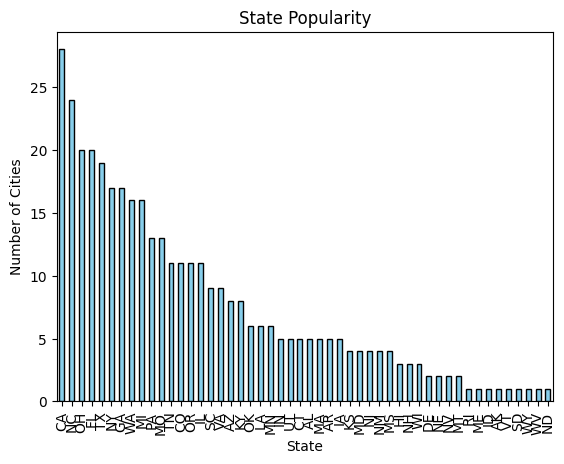

In [159]:
state_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('State Popularity')
plt.xlabel('State')
plt.ylabel('Number of Cities')
plt.show()

#### Filter for the Top 10 States

I want to conduct further analyses on the ten most popular states. To accomplish this, I need to create a new dataframe containing the top ten states of the state_counts series. 

In [160]:
#Use .nlargest(10) to select the top 10 states and save it to a series titled "top_ten_states"
top_ten_states = state_counts.nlargest(10)

#Create a dataframe of the result and print the dataframe for a neater visualization.
top_ten_states_df = pd.DataFrame({'State': top_ten_states.index, 'Count': top_ten_states.values})
print(top_ten_states_df)


  State  Count
0    CA     28
1    NC     24
2    OH     20
3    FL     20
4    TX     19
5    NY     17
6    GA     17
7    WA     16
8    MI     16
9    PA     13


### Time Series Analysis- Month to Month

I want to explore the trends in the amount of time it takes for homes to sell in the United States. A time series analysis will help us observe how time spent on the market changes over the months and years. 

Specifically, I want to focus on the following:

1. Data from 10/31/2018 - 10/31/2023.
2. The average amount of time it takes for a home to sell (for each state) in the series "top_ten_states" I created earlier.



##### Extract the Time Series Data:

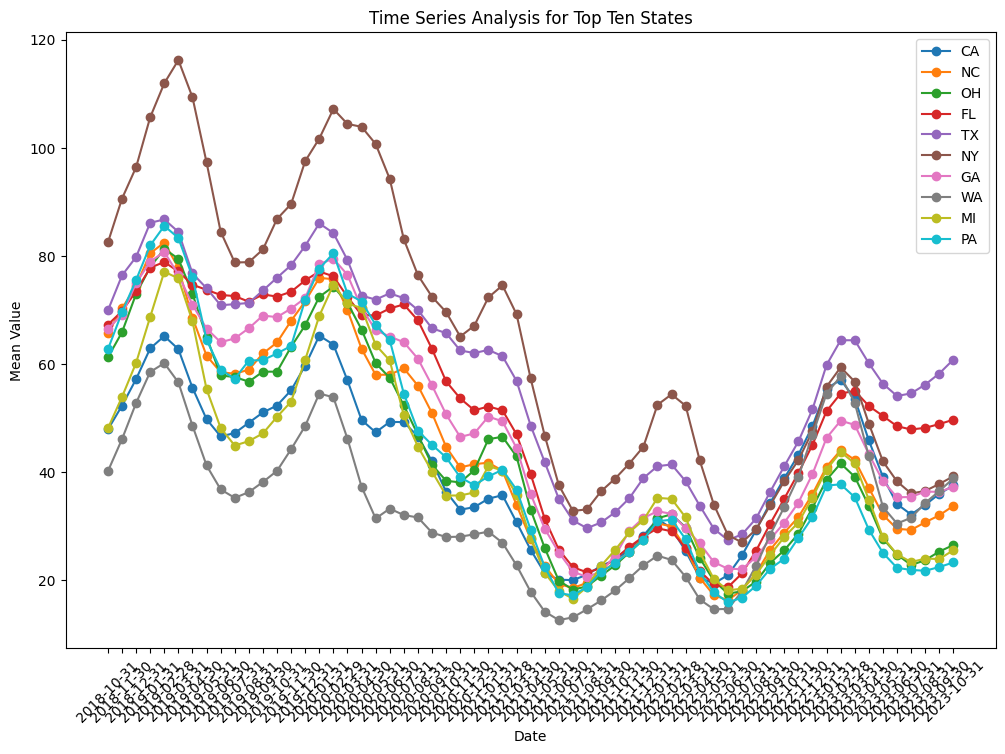

In [161]:
# List of top ten states
top_ten_states_list = top_ten_states.index.tolist()

#Loop through each state in our list and calculate the mean value of time homes stay on the market
#across all their cities for each date (year-month). Save results to "state_data".
plt.figure(figsize=(12, 8))
for state in top_ten_states_list:
    state_data = new_df[new_df['StateName'] == state].loc[:, '2018-10-31':'2023-10-31']
    plt.plot(state_data.columns, state_data.mean(), label=state, marker='o')

#Plot the Time Series results
plt.title('Time Series Analysis for Top Ten States')
plt.xlabel('Date')
plt.ylabel('Mean Value')
plt.xticks(rotation=45)
plt.legend()
plt.show()


Our graph provides plenty of detailed information for comparison. However, this visualization is quite busy. Additionally, this visualization gives us a surface level observation of the trends. I want to more closely examine the overall trends of the U.S housing market.

I can improve the time series plot through aggregration.

##### Time Series Analyses of Aggregrated Data:

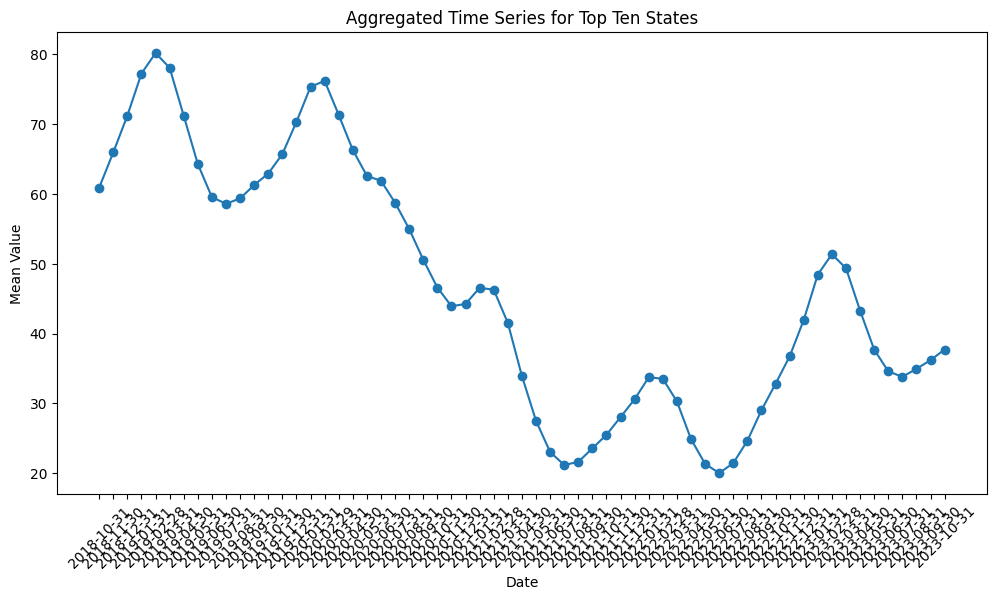

In [162]:
# Calculate mean values for each date across top ten states
top_ten_states_data = new_df[new_df['StateName'].isin(top_ten_states.index)].loc[:, '2018-10-31':'2023-10-31']
mean_values = top_ten_states_data.mean()

# Plot the aggregated time series
plt.figure(figsize=(12, 6))
plt.plot(mean_values.index, mean_values.values, marker='o')
plt.title('Aggregated Time Series for Top Ten States')
plt.xlabel('Date')
plt.ylabel('Mean Value')
plt.xticks(rotation=45)
plt.show()


Our new plot looks similar to the orginal time series plot that was created... as it should! However, now, our visualization is neater and easier to read, giving us a clearer picture of the overall trend.

### Comparing Trends Between States: California and Washington

Let's compare the average days on the market for homes in California (CA) and Washington State (WA) over the years 2019 to 2023. 

In [163]:
#View the unique States listed in our data to ensure we pull existing data for further analyses.
#print(df['StateName'].unique())

# Filter data for California and save data into new dataframe called "CA_data"
CA_data = new_df[new_df['StateName'] == 'CA']

#Filter data for Washington and save data into new dataframe called "WA_data"
WA_data = new_df[new_df['StateName'] == 'WA']

# List of years from 2019 -2023
years = range(2019, 2023)

# Select columns for each year in CA_data and sort them
CA_year_columns = sorted([max(CA_data.filter(like=f"{year}-").columns) for year in years])

# Select columns for each year in WA_data and sort them
WA_year_columns = sorted([max(WA_data.filter(like=f"{year}-").columns) for year in years])

# Create a DataFrame for the selected columns for both the CA_data and WA_data dataframes.
CA_year_data = CA_data[CA_year_columns]
WA_year_data = WA_data[WA_year_columns]

# Calculate the mean for each year in both states
CA_mean_values = CA_year_data.mean()
WA_mean_values = WA_year_data.mean()

# Extract the year from the index
CA_mean_values.index = pd.to_datetime(CA_mean_values.index).year
WA_mean_values.index = pd.to_datetime(WA_mean_values.index).year

Time to create a visualization! Using Seaborn, I will create a line plot with markers that shows the trend in average days for each year in our timeframe. 

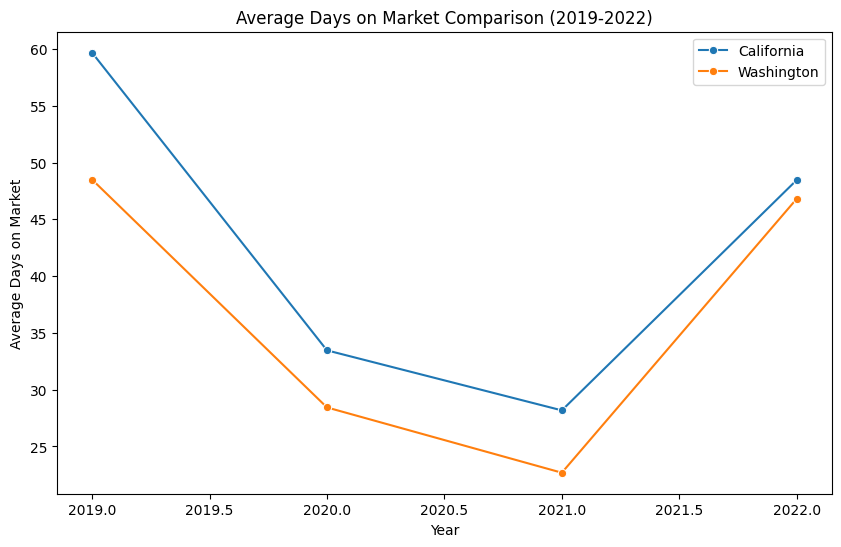

In [164]:
#Create a line plot for the average of mean days for each year 
plt.figure(figsize=(10,6))
sns.lineplot(x=CA_mean_values.index, y=CA_mean_values.values, marker='o', label='California')
sns.lineplot(x=WA_mean_values.index, y=WA_mean_values.values, marker='o', label='Washington')
plt.title('Average Days on Market Comparison (2019-2022)')
plt.xlabel('Year')
plt.ylabel('Average Days on Market')
plt.legend()
plt.show()

The line plot visualization allows us to compare the trends in average days between California and Washington. 

Upon further examination, there are other visualizations that may be a better option for showcasing our data. Currently, the line plot is comparing values for a total of four data points-- the years 2019, 2020, 2021, and 2022. Creating a line plot with such few data points risks creating a skewed or inaccurate perception of the data.

Maybe a bar plot will be better suited for this case!

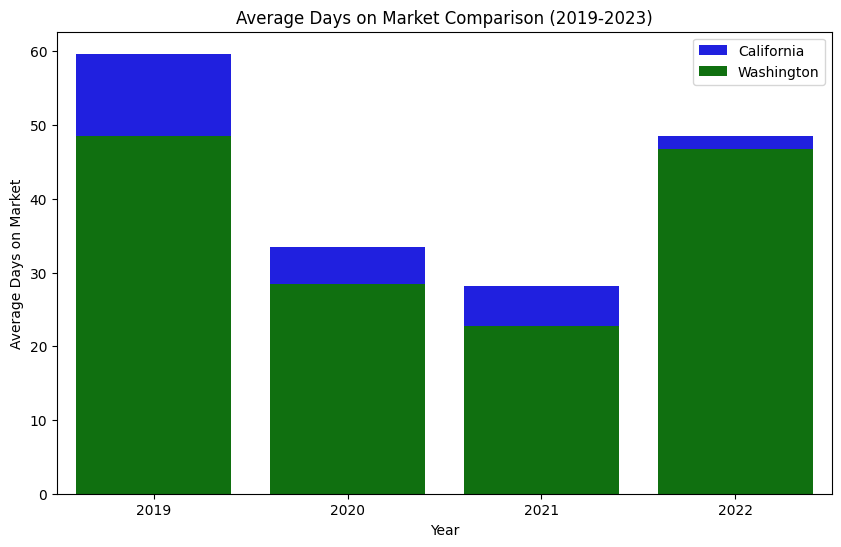

In [165]:
#Create a bar plot for the average mean days for each year
plt.figure(figsize=(10,6))
sns.barplot(x=CA_mean_values.index, y=CA_mean_values.values, color='blue', label='California')
sns.barplot(x=WA_mean_values.index, y=WA_mean_values.values, color='green', label='Washington')
plt.title('Average Days on Market Comparison (2019-2023)')
plt.xlabel('Year')
plt.ylabel('Average Days on Market')
plt.legend()
plt.show()

This bar plot provides a more clear comparison of the average amount of time in days that homes stay on the market before selling in both California and Washington. Still, I am not able to provide exact details based off this chart alone. If we were to present this information in a meeting or make this available to the public for their own research, we need to ensure that our results are readable. 

Let's fix this by creating an interactive barplot.

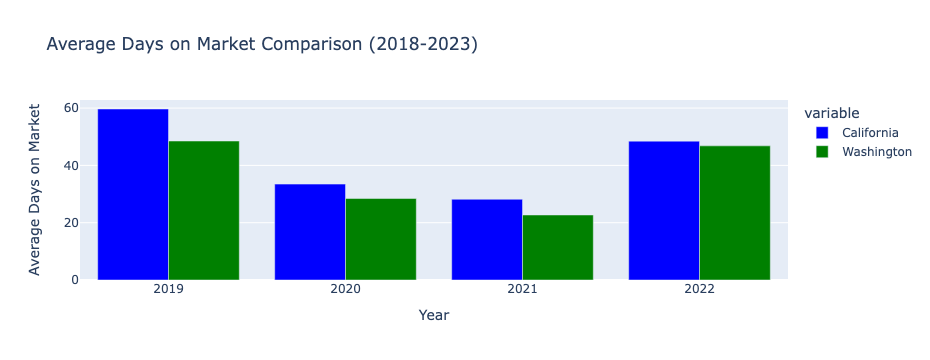

In [166]:
# Creating a DataFrame for plotting
plot_data = pd.DataFrame({
    'Year': CA_mean_values.index,
    'California': CA_mean_values.values,
    'Washington': WA_mean_values.values
})

# Creating an interactive bar plot with plotly express
fig = px.bar(
    plot_data,
    x='Year',
    y=['California', 'Washington'],
    title='Average Days on Market Comparison (2018-2023)',
    labels={'value': 'Average Days on Market'},
    template='plotly',
    color_discrete_map={'California': 'blue', 'Washington': 'green'},
    barmode='group'
)

# Show the plot
fig.show()

We can now hover over the the barplot to view our results.

That's it for this project, thank you!